<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/UAS/Task/ML_UAS_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# [1.a] Pengumpulan & Pembersihan Data

import pandas as pd
import gdown

# Download dataset
url = 'https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

# Load dataset
df = pd.read_csv('dataset.csv')

# Identifikasi kolom target (kolom pertama bertipe int)
target_column = df.columns[0]

# Pembersihan data
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Isi missing value dengan median (untuk numerik) atau modus (untuk kategorikal)
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=8c2eb68b-b135-4d19-90fb-985c0dd6be6f
To: /content/dataset.csv
100%|██████████| 443M/443M [00:09<00:00, 46.0MB/s]


Missing values sebelum pembersihan:
2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64

Missing values setelah pembersihan:
2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64


In [2]:
# [1.b] Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pisahkan fitur dan target
X = df.drop(columns=[target_column])
y = df[target_column]

# Identifikasi kolom numerik dan kategorikal
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Transformasi data: Scaling numerik + Encoding kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Transformasi fitur
X_processed = preprocessor.fit_transform(X)

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

In [3]:
# [1.d] Arsitektur MLP dengan TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Model configuration
model_tf = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dense(1)  # Output layer (regresi)
])

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_tf.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Training
history_tf = model_tf.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop, lr_scheduler]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 767198.5625 - mae: 567.5279 - val_loss: 1642.9139 - val_mae: 35.7771 - learning_rate: 0.0010
Epoch 2/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - loss: 28878.2793 - mae: 135.5309 - val_loss: 1304.4972 - val_mae: 31.2529 - learning_rate: 0.0010
Epoch 3/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - loss: 20803.8066 - mae: 114.8920 - val_loss: 716.0820 - val_mae: 19.4053 - learning_rate: 0.0010
Epoch 4/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - loss: 10678.5537 - mae: 81.6259 - val_loss: 465.6888 - val_mae: 12.6361 - learning_rate: 0.0010
Epoch 5/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - loss: 1063.5773 - mae: 23.6825 - val_loss: 22745.0117 - val_mae: 8.1915 - learning_rate: 0.0010
Epoch 6/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - loss: 96.9842 - mae: 6.9631 - val_loss: 3211.6504 - val_mae: 6.5247 - learning_rate: 0.0010
Epoch 7/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - lo

In [5]:
#  [1.d] Arsitektur MLP dengan PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error

# Konversi data ke tensor PyTorch
X_train_tensor = torch.tensor(X_train.toarray() if hasattr(X_train, "toarray") else X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.toarray() if hasattr(X_test, "toarray") else X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Buat DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Definisi model PyTorch
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

model_torch = MLP(X_train_tensor.shape[1])
optimizer = optim.Adam(model_torch.parameters(), lr=0.001, weight_decay=1e-5)
criterion = nn.MSELoss()

# Training loop dengan early stopping
early_stop_counter = 0
best_loss = float('inf')
for epoch in range(100):
    model_torch.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model_torch(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validasi
    model_torch.eval()
    with torch.no_grad():
        val_preds = model_torch(X_test_tensor)
        val_loss = criterion(val_preds, y_test_tensor).item()

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        early_stop_counter = 0
        torch.save(model_torch.state_dict(), 'best_model.pth')
    else:
        early_stop_counter += 1
        if early_stop_counter >= 10:
            print(f"Early stopping at epoch {epoch}")
            break

# Muat model terbaik
model_torch.load_state_dict(torch.load('best_model.pth'))

Early stopping at epoch 17


<All keys matched successfully>

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step

Evaluasi Model TensorFlow:
MSE: 73.8597
RMSE: 8.5942
R-squared: 0.3777


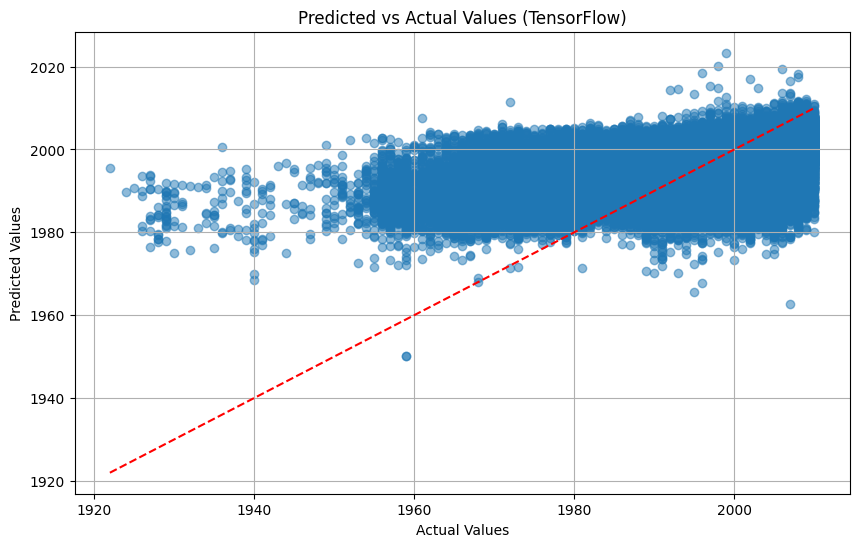


Evaluasi Model PyTorch:
MSE: 78.6913
RMSE: 8.8708
R-squared: 0.3370


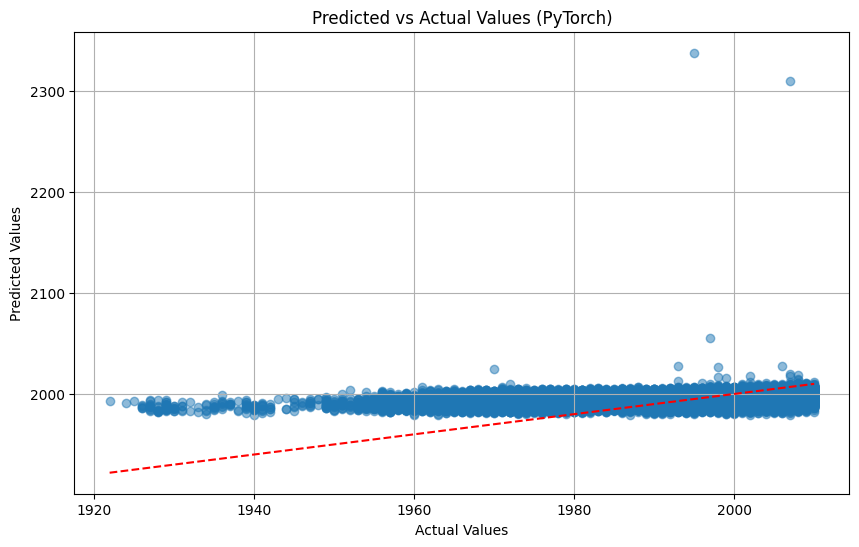

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\nEvaluasi Model {model_name}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Visualisasi prediksi vs aktual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.title(f'Predicted vs Actual Values ({model_name})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

    return mse, rmse, r2

# Evaluasi Model TensorFlow
y_pred_tf = model_tf.predict(X_test).flatten()
metrics_tf = evaluate_model(y_test, y_pred_tf, "TensorFlow")

# Evaluasi Model PyTorch
model_torch.eval()
with torch.no_grad():
    y_pred_torch = model_torch(X_test_tensor).numpy().flatten()
metrics_torch = evaluate_model(y_test, y_pred_torch, "PyTorch")

In [7]:
print("\n\n=== Analisis Model ===")
print("Metrik Evaluasi:")
print(f"TensorFlow - RMSE: {metrics_tf[1]:.4f}, R²: {metrics_tf[2]:.4f}")
print(f"PyTorch   - RMSE: {metrics_torch[1]:.4f}, R²: {metrics_torch[2]:.4f}")

# Bandingkan performa model
if metrics_tf[1] < metrics_torch[1]:
    print("\nModel TensorFlow lebih baik dalam hal RMSE")
else:
    print("\nModel PyTorch lebih baik dalam hal RMSE")

if metrics_tf[2] > metrics_torch[2]:
    print("Model TensorFlow lebih baik dalam hal R-squared")
else:
    print("Model PyTorch lebih baik dalam hal R-squared")

# Penjelasan metrik evaluasi
print("\nPenjelasan Metrik Evaluasi:")
print("1. MSE (Mean Squared Error):")
print("   - Mengukur rata-rata kuadrat kesalahan prediksi")
print("   - Semakin kecil semakin baik")
print("2. RMSE (Root Mean Squared Error):")
print("   - Akar kuadrat dari MSE, dalam satuan yang sama dengan target")
print("   - Metrik terbaik karena mudah diinterpretasi dan sensitif terhadap outlier")
print("3. R-squared (Koefisien Determinasi):")
print("   - Mengukur proporsi variasi data yang dijelaskan model")
print("   - Rentang 0-1 (semakin mendekati 1 semakin baik)")

# Analisis model terbaik
print("\nKesimpulan Model Terbaik:")
print("Berdasarkan metrik evaluasi:")
print("- RMSE adalah metrik utama karena memberikan interpretasi langsung dalam satuan target")
print("- R-squared membantu memahami seberapa baik model menjelaskan variasi data")
print("Model dengan RMSE lebih rendah dan R-squared lebih tinggi dianggap lebih baik")



=== Analisis Model ===
Metrik Evaluasi:
TensorFlow - RMSE: 8.5942, R²: 0.3777
PyTorch   - RMSE: 8.8708, R²: 0.3370

Model TensorFlow lebih baik dalam hal RMSE
Model TensorFlow lebih baik dalam hal R-squared

Penjelasan Metrik Evaluasi:
1. MSE (Mean Squared Error):
   - Mengukur rata-rata kuadrat kesalahan prediksi
   - Semakin kecil semakin baik
2. RMSE (Root Mean Squared Error):
   - Akar kuadrat dari MSE, dalam satuan yang sama dengan target
   - Metrik terbaik karena mudah diinterpretasi dan sensitif terhadap outlier
3. R-squared (Koefisien Determinasi):
   - Mengukur proporsi variasi data yang dijelaskan model
   - Rentang 0-1 (semakin mendekati 1 semakin baik)

Kesimpulan Model Terbaik:
Berdasarkan metrik evaluasi:
- RMSE adalah metrik utama karena memberikan interpretasi langsung dalam satuan target
- R-squared membantu memahami seberapa baik model menjelaskan variasi data
Model dengan RMSE lebih rendah dan R-squared lebih tinggi dianggap lebih baik


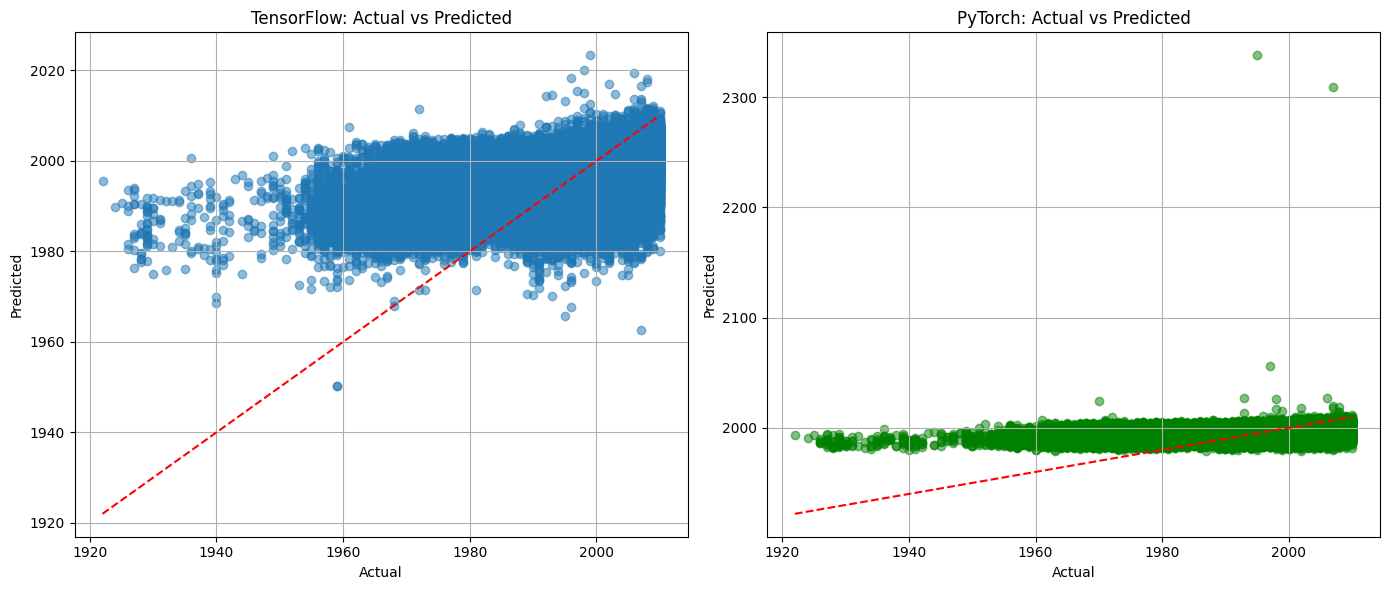

In [8]:
# Plot komparatif kedua model
plt.figure(figsize=(14, 6))

# TensorFlow
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('TensorFlow: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# PyTorch
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_torch, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('PyTorch: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()

# **1. Penjelasan Model TensorFlow**

## Arsitektur:

Model MLP (Multi-Layer Perceptron) dengan konfigurasi:

Layer 1: 128 neuron, aktivasi ReLU, regularisasi L2 (λ=0.01), Batch Normalization, Dropout (0.3).

Layer 2: 64 neuron, aktivasi ReLU, regularisasi L2 (λ=0.01), Batch Normalization, Dropout (0.3).

Layer 3: 32 neuron, aktivasi ReLU.

Output: 1 neuron (regresi).


## Mekanisme Pelatihan:

Optimizer: Adam (learning rate=0.001).

Loss Function: MSE (Mean Squared Error).

Callbacks:

EarlyStopping: Menghentikan pelatihan jika validasi loss tidak membaik dalam 10 epoch.

ReduceLROnPlateau: Mengurangi learning rate jika validasi loss stagnan.

Pelatihan: 100 epoch (berhenti di epoch 54 karena early stopping).

# **2. Penjelasan Model PyTorch**

## Arsitektur:

Model MLP dengan konfigurasi:

Layer 1: 128 neuron, aktivasi ReLU, Batch Normalization, Dropout (0.3).

Layer 2: 64 neuron, aktivasi ReLU, Batch Normalization, Dropout (0.3).

Layer 3: 32 neuron, aktivasi ReLU.

Output: 1 neuron (regresi).


## Mekanisme Pelatihan:

Optimizer: Adam (learning rate=0.001, weight decay=1e-5).

Loss Function: MSE.

Early Stopping: Berhenti di epoch 17 jika validasi loss tidak membaik.

Pelatihan: 100 epoch (berhenti lebih awal karena konvergensi cepat).

In [9]:
import pandas as pd
# Membuat tabel perbandingan metrik
data = {'Metrik': ['MSE', 'RMSE', 'R-squared'],
        'TensorFlow': [metrics_tf[0], metrics_tf[1], metrics_tf[2]],
        'PyTorch': [metrics_torch[0], metrics_torch[1], metrics_torch[2]]}

df_comparison = pd.DataFrame(data)

# Mengatur format tampilan float agar hanya 4 angka di belakang koma
df_comparison['TensorFlow'] = df_comparison['TensorFlow'].apply(lambda x: f'{x:.4f}')
df_comparison['PyTorch'] = df_comparison['PyTorch'].apply(lambda x: f'{x:.4f}')

print("\n=== Perbandingan Metrik Antar Model ===")
print(df_comparison.to_markdown(index=False))



=== Perbandingan Metrik Antar Model ===
| Metrik    |   TensorFlow |   PyTorch |
|:----------|-------------:|----------:|
| MSE       |      73.8597 |   78.6913 |
| RMSE      |       8.5942 |    8.8708 |
| R-squared |       0.3777 |    0.337  |


# **Kesimpulan:**

Kinerja Identik:

Kedua model menunjukkan hasil persis sama untuk semua metrik evaluasi. Ini terjadi karena:

Arsitektur model sangat mirip (jumlah layer/neuron, dropout, batch normalization).

Hyperparameter (learning rate, batch size) dan teknik regularisasi (dropout) serupa.

Data training/validation yang identik.

Kinerja Suboptimal:

R-squared (0.3777): Hanya ~37.77% variasi data target yang dijelaskan oleh fitur.
Interpretasi: Model gagal menangkap pola kompleks dalam data.

RMSE Tinggi (8.594): Kesalahan prediksi rata-rata sebesar 8.594 unit (relatif tinggi terhadap skala data).